In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

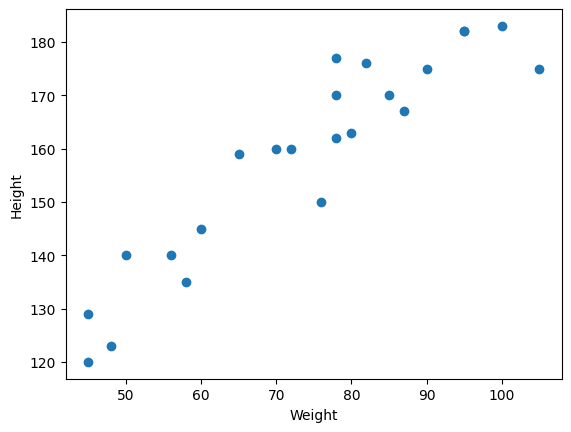

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel("Height")

Create Dependent and Independent features

In [6]:
X = df['Weight']
y = df['Height']


Split the data into train and test

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
y_train

16    140
3     145
12    175
9     170
4     160
10    176
5     162
17    159
1     135
2     123
7     175
19    167
18    150
11    182
22    160
13    183
15    177
8     182
Name: Height, dtype: int64

In [11]:
y_test

20    129
0     120
21    140
6     163
14    170
Name: Height, dtype: int64

Standardize the dataset

In [14]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()

# Convert Series to DataFrame
X_train = X_train.to_frame()
X_test = X_test.to_frame()

# Fit and transform the training data
X_train_scaled = stdscaler.fit_transform(X_train)

# Only transform the test data (using the parameters learned from training data)
X_test_scaled = stdscaler.transform(X_test)


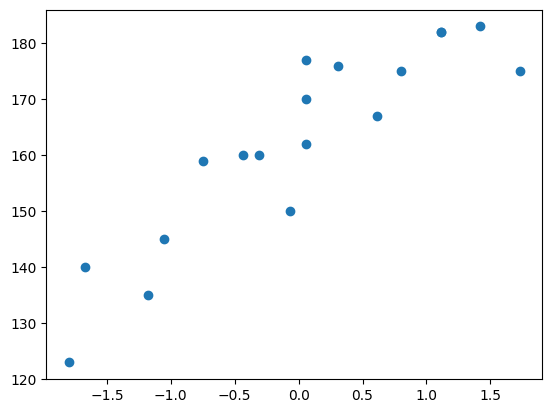

In [15]:
plt.scatter(X_train_scaled,y_train)

Linear Regression model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
Lr = LinearRegression()

In [18]:
type(X_train_scaled)

numpy.ndarray

In [19]:
Lr.fit(X_train_scaled,y_train)

LinearRegression()

In [20]:
print("Coefficient:",Lr.coef_)
print("Intercept:",Lr.intercept_)

Coefficient: [15.39973275]
Intercept: 162.27777777777777


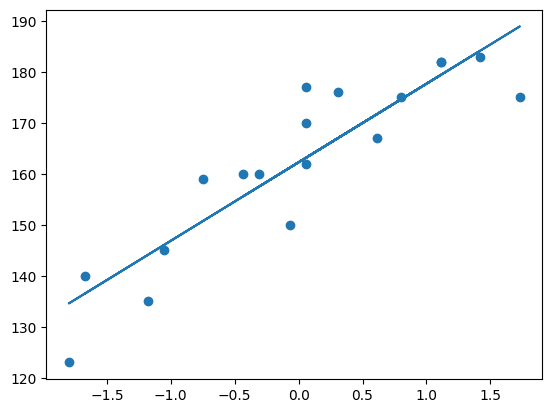

In [21]:
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled,Lr.predict(X_train_scaled))

Prediction of test data

In [22]:
y_pred_test = Lr.predict(X_test_scaled)

In [23]:
y_test

20    129
0     120
21    140
6     163
14    170
Name: Height, dtype: int64

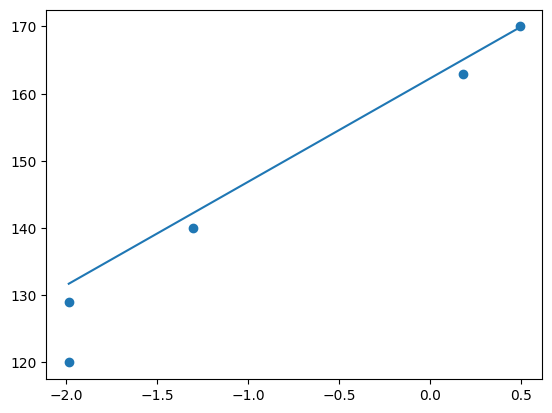

In [24]:
plt.scatter(X_test_scaled,y_test)
plt.plot(X_test_scaled,y_pred_test)

Performance Metrics

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


30.787960729894365
3.775009758116977
5.548690001243029


In [27]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)

In [28]:
print(score)

0.9169329788207037


R_2 Score

R^2 = 1- (SSR/SST)

R^2 = Coefficient of determination 
SSR = sum of squares of residuals
SST = Total sum of squares

Adjusted R2 = 1- [(1-R2)*(n-1)/(n-k-1)]


R2 = R2 score of model
n = number of observations
k = number of predictor variables

In [29]:
adjusted_score = 1 - (1- score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

In [30]:
print(adjusted_score)

0.8892439717609383
